Author: Nicolas Legrand <nicolas.legrand@cfin.au.dk>

In [22]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pingouin as pg
from plotting import raincloud

sns.set_context('talk')

In [73]:
path = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
outputpath = os.path.join(
    os.path.abspath(os.path.join(os.getcwd(), os.pardir)),
    'data')

# Post hoc estimation of psychometric functions using PyMC3

Model fitting is performed using PyMC3 by running the `bayesianPsychophysics.py` file.

# Psychometric parameters - Psi estimates

In [136]:
behavior_df = pd.read_csv(os.path.join(outputpath, 'behavior.txt'))

In [137]:
print(f'n Session 1 = {behavior_df[(behavior_df.Session=="Del1") & (~behavior_df["Slope"].isnull())].Subject.nunique()}')

print(f'n Session 2 = {behavior_df[(behavior_df.Session=="Del2") & (~behavior_df["Slope"].isnull())].Subject.nunique()}')

n Session 1 = 205
n Session 2 = 187


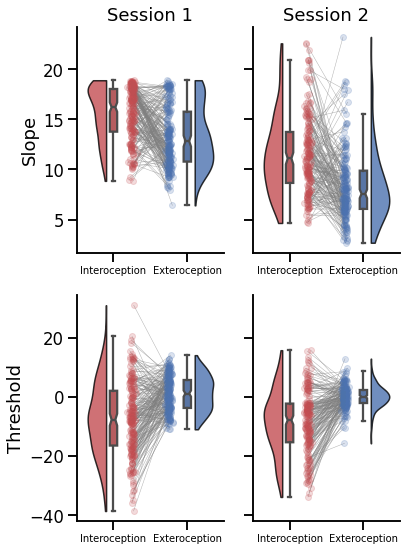

In [138]:
sns.set_context('talk')
fig, axs = plt.subplots(2, 2, figsize=(6, 8), sharey='row')
for i, metric in enumerate(['Slope', 'Threshold']):
    for ii, session in enumerate(['Del1', 'Del2']):
        raincloud(data=behavior_df[(behavior_df.Session==session) & (~behavior_df['Slope'].isnull()) & (~behavior_df['Threshold'].isnull())], x='Modality', y=metric, ax=axs[i, ii], palette=['#c44e52', '#4c72b0'])
        labels = [item.get_text() for item in axs[i, ii].get_xticklabels()]
        labels[0] = 'Interoception'
        labels[1] = 'Exteroception'
        axs[i, ii].set_xticklabels(labels, size=10)

axs[0, 0].set_title('Session 1')
axs[0, 1].set_title('Session 2')
axs[0, 0].set_ylabel('Slope')
axs[1, 0].set_ylabel('Threshold')
plt.tight_layout()
sns.despine()
plt.savefig(path + '/figures/Supplement1.svg', dpi=300)

In [139]:
pg.pairwise_ttests(data=behavior_df[behavior_df.Session=='Del1'], dv='Threshold', within='Modality', effsize='cohen')

,Contrast,A,B,Paired,Parametric,T,dof,Tail,p-unc,BF10,cohen
0,Modality,Intero,Extero,True,True,-9.749091,204.0,two-sided,1.117549e-18,4.36e+15,-0.896845


In [140]:
pg.pairwise_ttests(data=behavior_df[behavior_df.Session=='Del2'], dv='Threshold', within='Modality', effsize='cohen')

,Contrast,A,B,Paired,Parametric,T,dof,Tail,p-unc,BF10,cohen
0,Modality,Intero,Extero,True,True,-11.635888,186.0,two-sided,7.267868e-24,5.484e+20,-1.073992


In [141]:
pg.pairwise_ttests(data=behavior_df[behavior_df.Session=='Del1'], dv='Slope', within='Modality', effsize='cohen')

,Contrast,A,B,Paired,Parametric,T,dof,Tail,p-unc,BF10,cohen
0,Modality,Intero,Extero,True,True,8.153624,204.0,two-sided,3.542390e-14,1.729e+11,0.834132


In [142]:
pg.pairwise_ttests(data=behavior_df[behavior_df.Session=='Del2'], dv='Slope', within='Modality', effsize='cohen')

,Contrast,A,B,Paired,Parametric,T,dof,Tail,p-unc,BF10,cohen
0,Modality,Intero,Extero,True,True,8.700586,186.0,two-sided,1.735307e-15,3.357e+12,0.852063


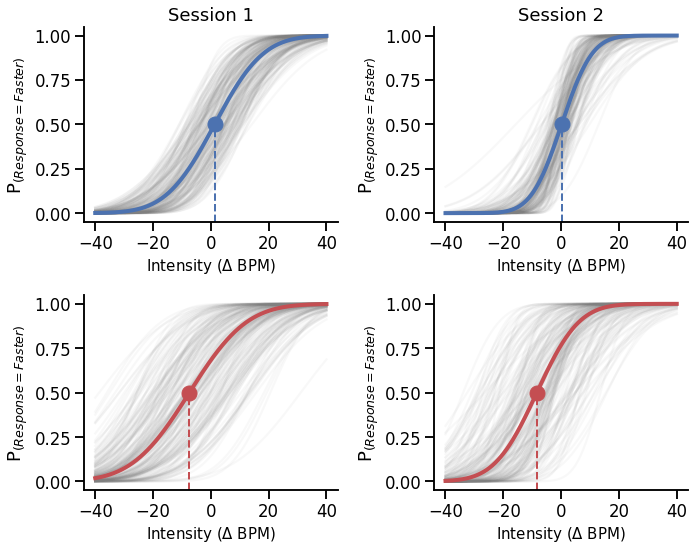

In [143]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
for i, modality, col in zip((0, 1), ['Extero', 'Intero'], ['#4c72b0', '#c44e52']):
    for ii, session in enumerate(['Del1', 'Del2']):
        threshold, slope = [], []
        for subject in behavior_df[(behavior_df.Session == session)].Subject.unique():
            threshold.append(behavior_df.Threshold[(behavior_df.Session == session) & (behavior_df.Modality == modality) & (behavior_df.Subject == subject)].values)
            slope.append(behavior_df.Slope[(behavior_df.Session == session) & (behavior_df.Modality == modality) & (behavior_df.Subject == subject)].values)

            # Plot Psi estimate of psychometric function
            axs[i, ii].plot(np.linspace(-40, 40, 500), 
                    (norm.cdf(np.linspace(-40, 40, 500), loc=threshold[-1], scale=slope[-1])),
                    '-', color='gray', alpha=.05)
            axs[i, ii].set_ylabel('P$_{(Response=Faster)}$')
            axs[i, ii].set_xlabel('Intensity ($\Delta$ BPM)', size=15)
        axs[i, ii].plot(np.linspace(-40, 40, 500), 
                (norm.cdf(np.linspace(-40, 40, 500), loc=np.array([threshold]).mean(), scale=np.array([slope]).mean())),
                '-', color=col, linewidth=4)
        axs[i, ii].plot(np.array([threshold]).mean(), 0.5, 'o', color=col, markersize=15)
        axs[i, ii].axvline(x=np.array([threshold]).mean(), ymin=0, ymax=0.5, linestyle='--', color=col, linewidth=2)
axs[0, 0].set_title('Session 1')
axs[0, 1].set_title('Session 2')
plt.tight_layout()
sns.despine()
plt.savefig(path + '/figures/Supplement2.svg', dpi=600)

# Psychometric parameters - post hoc Bayesian estimates

In [144]:
del1 = pd.read_csv(os.path.join(outputpath, 'Del1_psychophysics.txt'))
del1['Session'] = 'Del1'
del2 = pd.read_csv(os.path.join(outputpath, 'Del2_psychophysics.txt'))
del2['Session'] = 'Del2'
behavior_df = del1.append(del2)

In [145]:
print(f'n Session 1 = {behavior_df[(behavior_df.Session=="Del1") & (~behavior_df["BayesianSlope"].isnull())].Subject.nunique()}')

print(f'n Session 2 = {behavior_df[(behavior_df.Session=="Del2") & (~behavior_df["BayesianSlope"].isnull())].Subject.nunique()}')

n Session 1 = 205
n Session 2 = 187


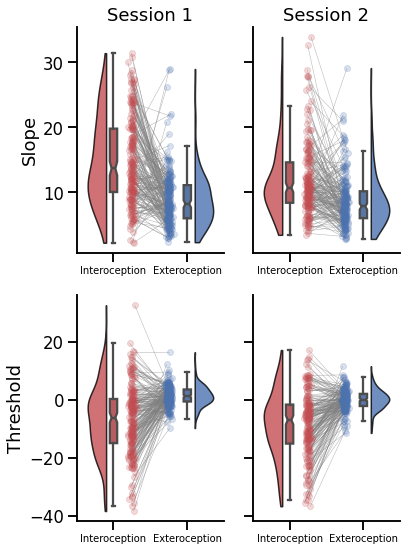

In [146]:
sns.set_context('talk')
fig, axs = plt.subplots(2, 2, figsize=(6, 8), sharey='row')
for i, metric in enumerate(['BayesianSlope', 'BayesianThreshold']):
    for ii, session in enumerate(['Del1', 'Del2']):
        raincloud(data=behavior_df[(behavior_df.Session==session) & (~behavior_df['BayesianSlope'].isnull()) & (~behavior_df['BayesianThreshold'].isnull())], x='Modality', y=metric, ax=axs[i, ii], palette=['#c44e52', '#4c72b0'])
        labels = [item.get_text() for item in axs[i, ii].get_xticklabels()]
        labels[0] = 'Interoception'
        labels[1] = 'Exteroception'
        axs[i, ii].set_xticklabels(labels, size=10)

axs[0, 0].set_title('Session 1')
axs[0, 1].set_title('Session 2')
axs[0, 0].set_ylabel('Slope')
axs[1, 0].set_ylabel('Threshold')
plt.tight_layout()
sns.despine()
plt.savefig(path + '/figures/Fig2_parameters.svg', dpi=300)

In [147]:
pg.pairwise_ttests(data=behavior_df[behavior_df.Session=='Del1'], dv='BayesianThreshold', within='Modality', effsize='cohen')

,Contrast,A,B,Paired,Parametric,T,dof,Tail,p-unc,BF10,cohen
0,Modality,Intero,Extero,True,True,-9.972079,204.0,two-sided,2.483846e-19,1.905e+16,-0.94341


In [148]:
pg.pairwise_ttests(data=behavior_df[behavior_df.Session=='Del2'], dv='BayesianThreshold', within='Modality', effsize='cohen')

,Contrast,A,B,Paired,Parametric,T,dof,Tail,p-unc,BF10,cohen
0,Modality,Intero,Extero,True,True,-11.119157,186.0,two-sided,2.388412e-22,1.772e+19,-1.039587


In [149]:
pg.pairwise_ttests(data=behavior_df[behavior_df.Session=='Del1'], dv='BayesianSlope', within='Modality', effsize='cohen')

,Contrast,A,B,Paired,Parametric,T,dof,Tail,p-unc,BF10,cohen
0,Modality,Intero,Extero,True,True,10.460235,204.0,two-sided,8.894276e-21,4.997e+17,1.046813


In [150]:
pg.pairwise_ttests(data=behavior_df[behavior_df.Session=='Del2'], dv='BayesianSlope', within='Modality', effsize='cohen')

,Contrast,A,B,Paired,Parametric,T,dof,Tail,p-unc,BF10,cohen
0,Modality,Intero,Extero,True,True,7.04847,186.0,two-sided,3.427189e-11,2.214e+08,0.653045


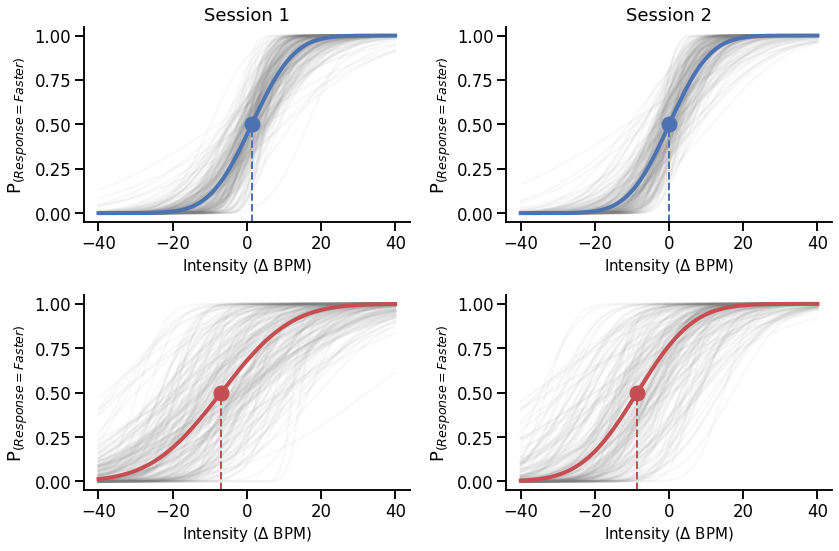

In [168]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
for i, modality, col in zip((0, 1), ['Extero', 'Intero'], ['#4c72b0', '#c44e52']):
    for ii, session in enumerate(['Del1', 'Del2']):
        threshold, slope = [], []
        for subject in behavior_df[(behavior_df.Session == session)].Subject.unique():
            threshold.append(behavior_df.BayesianThreshold[(behavior_df.Session == session) & (behavior_df.Modality == modality) & (behavior_df.Subject == subject)].values)
            slope.append(behavior_df.BayesianSlope[(behavior_df.Session == session) & (behavior_df.Modality == modality) & (behavior_df.Subject == subject)].values)

            # Plot Psi estimate of psychometric function
            axs[i, ii].plot(np.linspace(-40, 40, 500), 
                    (norm.cdf(np.linspace(-40, 40, 500), loc=threshold[-1], scale=slope[-1])),
                    '-', color='gray', alpha=.05)
            axs[i, ii].set_ylabel('P$_{(Response=Faster)}$')
            axs[i, ii].set_xlabel('Intensity ($\Delta$ BPM)', size=15)
        axs[i, ii].plot(np.linspace(-40, 40, 500), 
                (norm.cdf(np.linspace(-40, 40, 500), loc=np.array([threshold]).mean(), scale=np.array([slope]).mean())),
                '-', color=col, linewidth=4)
        axs[i, ii].plot(np.array([threshold]).mean(), 0.5, 'o', color=col, markersize=15)
        axs[i, ii].axvline(x=np.array([threshold]).mean(), ymin=0, ymax=0.5, linestyle='--', color=col, linewidth=2)
axs[0, 0].set_title('Session 1')
axs[0, 1].set_title('Session 2')
plt.tight_layout()
sns.despine()
plt.savefig(path + '/figures/Fig2_functions.svg', dpi=600)

# Test re-test

In [214]:
corr_df = pd.merge(behavior_df[(behavior_df.Session=='Del1')], behavior_df[(behavior_df.Session=='Del2')], on=['Subject', 'Modality'])

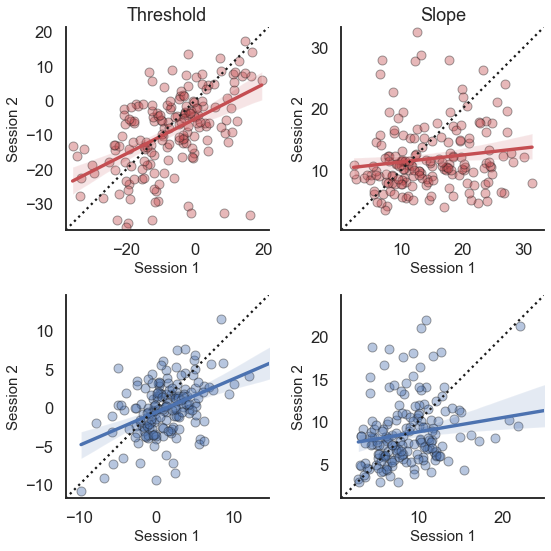

In [215]:
sns.set(style="white", color_codes=True)
sns.set_context('talk')

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))
for mod, var, ax, col in zip(['Intero', 'Intero', 'Extero', 'Extero'],
                            [('BayesianThreshold_x', 'BayesianThreshold_y'), ('BayesianSlope_x', 'BayesianSlope_y'), ('BayesianThreshold_x', 'BayesianThreshold_y'), ('BayesianSlope_x', 'BayesianSlope_y')],
                            [axs[0, 0], axs[0, 1], axs[1, 0], axs[1, 1]],
                             ['#c44e52', '#c44e52', '#4c72b0', '#4c72b0']):

    sns.regplot(data=corr_df[corr_df.Modality==mod], x=var[0], y=var[1], ax=ax, scatter_kws={'edgecolors': 'k', 'alpha': 0.4}, color=col)
    
    x0, x1 = ax.get_xlim()
    y0, y1 = ax.get_ylim()
    lims = [max(x0, y0)-2, min(x1, y1)+2]
    ax.plot(lims, lims, ':k')
    ax.set_xlabel('Session 1', size=15)
    ax.set_ylabel('Session 2', size=15)
    ax.set_xlim(lims)
    ax.set_ylim(lims)

axs[0, 0].set_title('Threshold')
axs[0, 1].set_title('Slope')

plt.tight_layout()
sns.despine()
plt.savefig(path + '/figures/Fig2_Correlations.svg', dpi=300)

In [221]:
pg.corr(x=corr_df[corr_df.Modality=='Intero'].BayesianThreshold_x.to_numpy(), 
        y=corr_df[corr_df.Modality=='Intero'].BayesianThreshold_y.to_numpy(),
        method='spearman')

,n,r,CI95%,r2,adj_r2,p-val,power
spearman,173,0.529562,"[0.41, 0.63]",0.280436,0.271971,6.824870e-14,1.0


In [222]:
pg.corr(x=corr_df[corr_df.Modality=='Intero'].BayesianSlope_x.to_numpy(), 
        y=corr_df[corr_df.Modality=='Intero'].BayesianSlope_y.to_numpy(),
        method='spearman')

,n,r,CI95%,r2,adj_r2,p-val,power
spearman,173,0.186106,"[0.04, 0.33]",0.034635,0.023278,0.014224,0.691971


In [225]:
pg.corr(x=corr_df[corr_df.Modality=='Extero'].BayesianThreshold_x.to_numpy(), 
        y=corr_df[corr_df.Modality=='Extero'].BayesianThreshold_y.to_numpy(),
        method='spearman')

,n,r,CI95%,r2,adj_r2,p-val,power
spearman,173,0.406042,"[0.27, 0.52]",0.16487,0.155045,2.980565e-08,0.99988


In [226]:
pg.corr(x=corr_df[corr_df.Modality=='Extero'].BayesianSlope_x.to_numpy(), 
        y=corr_df[corr_df.Modality=='Extero'].BayesianSlope_y.to_numpy(),
        method='spearman')

,n,r,CI95%,r2,adj_r2,p-val,power
spearman,173,0.272323,"[0.13, 0.41]",0.07416,0.063268,0.000289,0.954689


# Correlation between psi and Bayesian fit

## Threshold

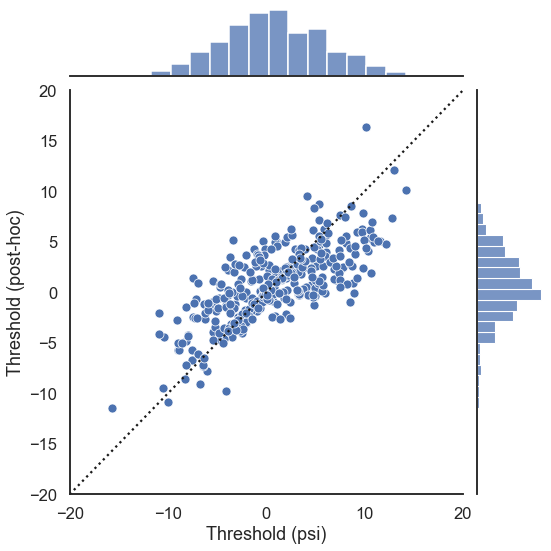

In [186]:
g = sns.jointplot(data=behavior_df[behavior_df.Modality=='Extero'],
                  x='Threshold', y='BayesianThreshold', xlim=(-20, 20),
                  ylim=(-20, 20), color='#4c72b0', height=8)
x0, x1 = g.ax_joint.get_xlim()
y0, y1 = g.ax_joint.get_ylim()
lims = [max(x0, y0), min(x1, y1)]
g.ax_joint.plot(lims, lims, ':k')
g.ax_joint.set_ylabel('Threshold (post-hoc)')
g.ax_joint.set_xlabel('Threshold (psi)')
plt.savefig(path + '/figures/thresholdExtero.svg', dpi=300)

In [160]:
pg.corr(x=behavior_df[behavior_df.Modality=='Extero'].Threshold,
        y=behavior_df[behavior_df.Modality=='Extero'].BayesianThreshold, method='spearman')

,n,r,CI95%,r2,adj_r2,p-val,power
spearman,358,0.737473,"[0.69, 0.78]",0.543867,0.541297,1.189918e-62,1.0


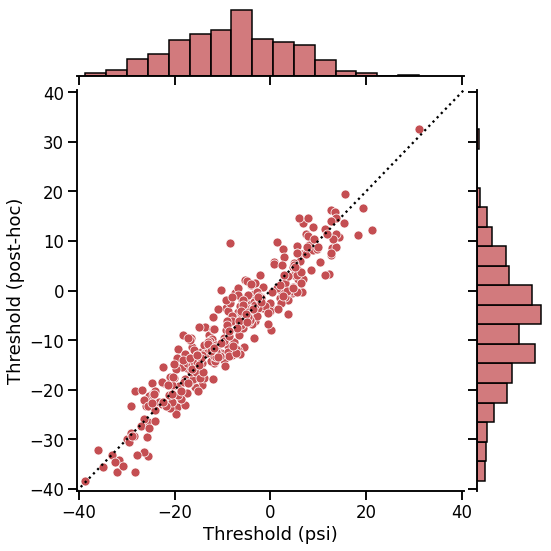

In [162]:
g = sns.jointplot(data=behavior_df[behavior_df.Modality=='Intero'], x='Threshold',
                  y='BayesianThreshold', xlim=(-40.5, 40.5), ylim=(-40.5, 40.5), color='#c44e52', height=8)
x0, x1 = g.ax_joint.get_xlim()
y0, y1 = g.ax_joint.get_ylim()
lims = [max(x0, y0), min(x1, y1)]
g.ax_joint.plot(lims, lims, ':k')
g.ax_joint.set_ylabel('Threshold (post-hoc)')
g.ax_joint.set_xlabel('Threshold (psi)')
plt.savefig(path + '/figures/thresholdIntero.svg', dpi=300)

In [163]:
pg.corr(x=behavior_df[behavior_df.Modality=='Intero'].Threshold,
        y=behavior_df[behavior_df.Modality=='Intero'].BayesianThreshold, method='spearman')

,n,r,CI95%,r2,adj_r2,p-val,power
spearman,348,0.944623,"[0.93, 0.95]",0.892313,0.891688,1.664109e-169,1.0


## Slope

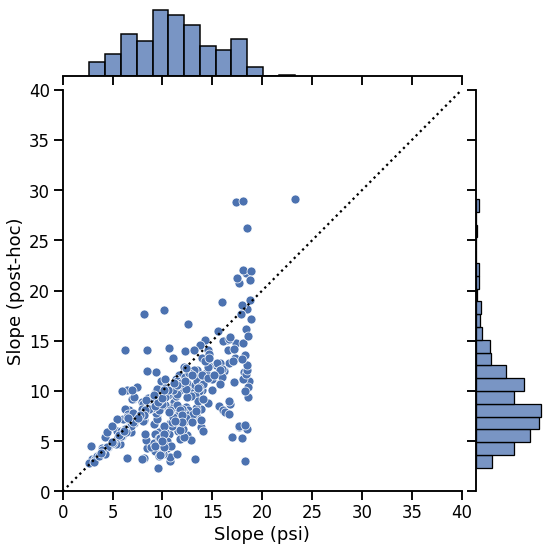

In [164]:
g = sns.jointplot(data=behavior_df[behavior_df.Modality=='Extero'], x='Slope',
                  y='BayesianSlope', xlim=(0, 40), ylim=(0, 40), color='#4c72b0', height=8)
x0, x1 = g.ax_joint.get_xlim()
y0, y1 = g.ax_joint.get_ylim()
lims = [max(x0, y0), min(x1, y1)]
g.ax_joint.plot(lims, lims, ':k')
g.ax_joint.set_ylabel('Slope (post-hoc)')
g.ax_joint.set_xlabel('Slope (psi)')
plt.savefig(path + '/figures/slopeExtero.svg', dpi=300)

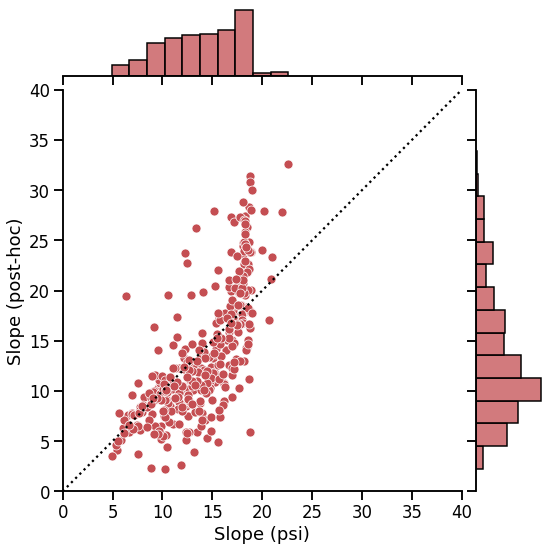

In [165]:
g = sns.jointplot(data=behavior_df[behavior_df.Modality=='Intero'], x='Slope',
                  y='BayesianSlope', xlim=(0, 40), ylim=(0, 40), color='#c44e52', height=8)
x0, x1 = g.ax_joint.get_xlim()
y0, y1 = g.ax_joint.get_ylim()
lims = [max(x0, y0), min(x1, y1)]
g.ax_joint.plot(lims, lims, ':k')
g.ax_joint.set_ylabel('Slope (post-hoc)')
g.ax_joint.set_xlabel('Slope (psi)')
plt.savefig(path + '/figures/slopeIntero.svg', dpi=300)

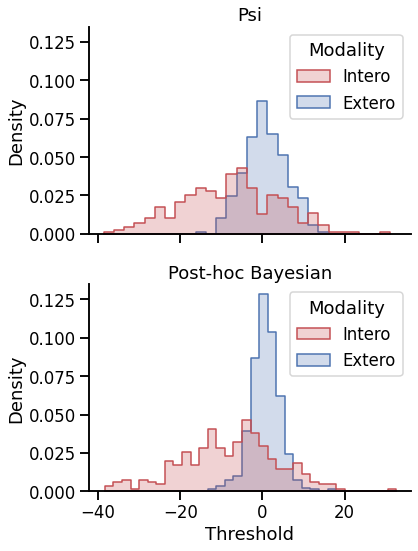

In [166]:
fig, axs = plt.subplots(2, 1, figsize=(6, 8), sharey=True, sharex=True)
sns.histplot(data=behavior_df, x='Threshold', hue='Modality', palette=['#c44e52', '#4c72b0'], ax=axs[0], common_norm=False, element="step", stat="density")
sns.histplot(data=behavior_df, x='BayesianThreshold', hue='Modality', palette=['#c44e52', '#4c72b0'], ax=axs[1], common_norm=False, element="step", stat="density")
axs[1].set_xlabel('Threshold')
axs[0].set_title('Psi')
axs[1].set_title('Post-hoc Bayesian')
plt.tight_layout()
sns.despine()
plt.savefig(path + '/figures/thresholdHist.svg', dpi=300)

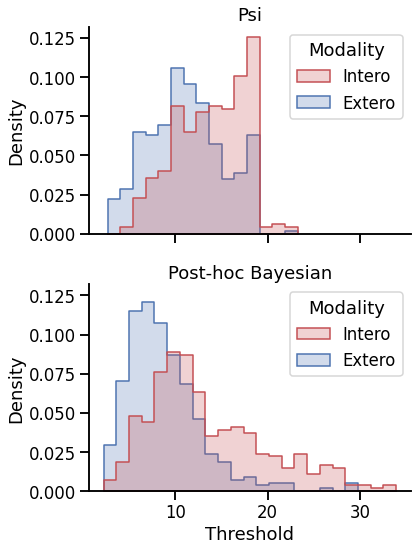

In [167]:
fig, axs = plt.subplots(2, 1, figsize=(6, 8), sharey=True, sharex=True)
sns.histplot(data=behavior_df, x='Slope', hue='Modality', palette=['#c44e52', '#4c72b0'], ax=axs[0], common_norm=False, element="step", stat="density")
sns.histplot(data=behavior_df, x='BayesianSlope', hue='Modality', palette=['#c44e52', '#4c72b0'], ax=axs[1], common_norm=False, element="step", stat="density")
axs[0].set_title('Psi')
axs[1].set_title('Post-hoc Bayesian')
axs[1].set_xlabel('Threshold')
plt.tight_layout()
sns.despine()
plt.savefig(path + '/figures/slopeHist.svg', dpi=300)